In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import huggingface_hub
splits = {'train': 'train.csv', 'test': 'test.csv'}
df_train = pd.read_csv("hf://datasets/Mireu-Lab/NSL-KDD/" + splits["train"])
df_test = pd.read_csv("hf://datasets/Mireu-Lab/NSL-KDD/" + splits["test"])

In [9]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df_train.shape

In [10]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,anomaly
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,anomaly
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,anomaly
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,anomaly


In [11]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
print(df_train['class'].unique())
print(df_test['class'].unique())

['normal' 'anomaly']
['anomaly' 'normal']


In [14]:
#One hot encoding categorical features

df_train = pd.get_dummies(df_train,columns=['protocol_type', 'service', 'flag'])
df_test = pd.get_dummies(df_test,columns=['protocol_type', 'service', 'flag'])

In [15]:
df_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train['class'] = encoder.fit_transform(df_train['class'])
df_test['class'] = encoder.fit_transform(df_test['class'])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


In [19]:
df_train = df_train.astype(int)
df_test = df_test.astype(int)

In [20]:
df_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_col_train = df_train.select_dtypes(include=["float64","int64"]).columns.drop("class")
numerical_col_test = df_test.select_dtypes(include=["float64","int64"]).columns.drop("class")

In [25]:
df_train[numerical_col_train] = scaler.fit_transform(df_train[numerical_col_train])
df_test[numerical_col_test] = scaler.fit_transform(df_test[numerical_col_test])

In [33]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['class'])
y = df_train['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = rf.predict(X_test)

In [36]:
y_prob = rf.predict_proba(X_test)[:,1]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13924
           1       1.00      1.00      1.00     16309

    accuracy                           1.00     30233
   macro avg       1.00      1.00      1.00     30233
weighted avg       1.00      1.00      1.00     30233



In [40]:
print(confusion_matrix(y_pred,y_test))

[[13913    11]
 [   10 16299]]


In [41]:
print(roc_auc_score(y_pred,y_test))

0.9992984193742266


In [43]:
imp_feature = rf.feature_importances_
feature_name = X_train.columns

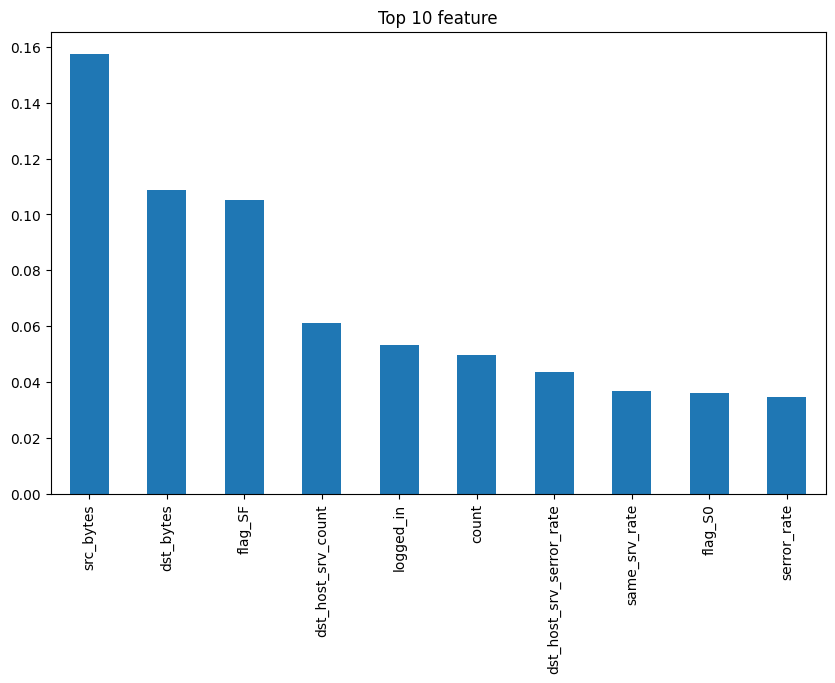

In [44]:
plt.figure(figsize=(10,6))
pd.Series(imp_feature,index=feature_name).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 feature")
plt.show()

It shows that Source bytes and destination bytes are important.
They represent the amount of data transferred from the source to destination.

Sudden spikes in these values could indicate anomalies.

In [47]:
import seaborn as sns

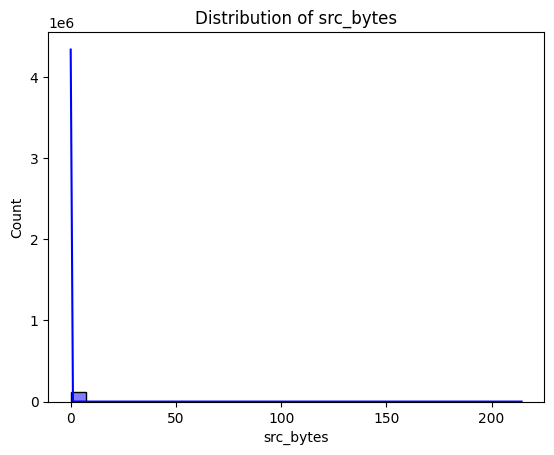

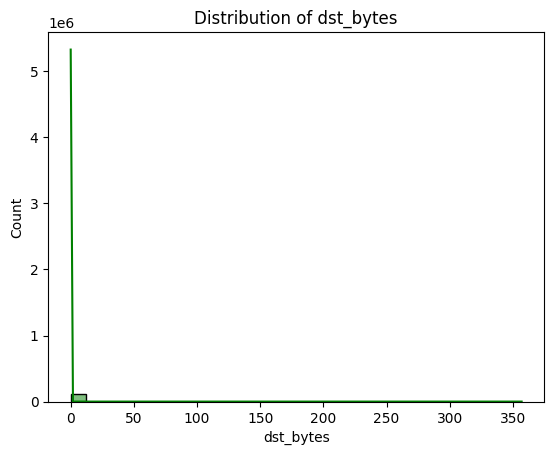

In [55]:
plt.Figure(figsize=(12,6))
sns.histplot(data=X_train, x='src_bytes', kde=True,bins=30,color='blue')
plt.title("Distribution of src_bytes")
plt.show()

sns.histplot(data=X_train, x='dst_bytes', kde=True,bins=30,color='green')
plt.title("Distribution of dst_bytes")

#plt.tight_layout()
plt.show()

In [56]:
#Applying log transformation to reduce the skewness

X_train['dst_bytes_log'] = np.log1p(X_train['dst_bytes'])

C:\Users\Artophilic\AppData\Local\Temp\ipykernel_14876\3593648852.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['dst_bytes_log'] = np.log1p(X_train['dst_bytes'])


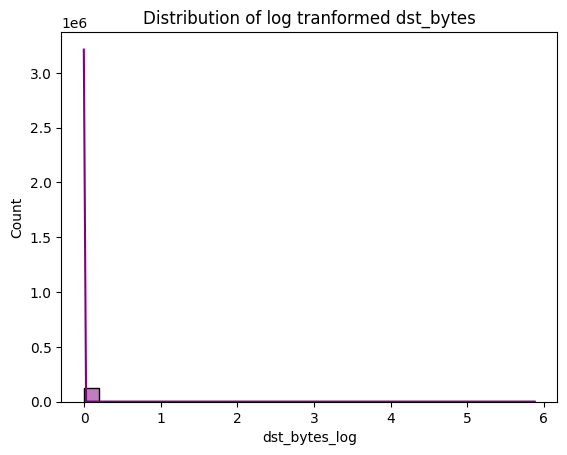

In [57]:
plt.Figure(figsize=(12,6))
sns.histplot(data=X_train, x='dst_bytes_log', kde=True,bins=30,color='purple')
plt.title("Distribution of log tranformed dst_bytes")
plt.show()

In [58]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [60]:
predictions = rf.predict(X_test)

In [61]:
predictions

array([1, 0, 1, ..., 1, 1, 0], shape=(30233,))

In [62]:
X_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
18078,-0.110806,-0.007600,-0.004514,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,1.236111,-0.012157,...,-0.312502,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,0.825314,-0.045624
49195,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,3.199980,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624
94231,-0.110806,-0.007675,-0.004383,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,1.236111,-0.012157,...,-0.312502,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,0.825314,-0.045624
16609,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.312502,-0.111796,-0.028653,-0.140297,1.615922,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624
81445,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,3.199980,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624


In [63]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,dst_bytes_log
105969,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,1.615922,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624,-0.004659
142780,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624,-0.004659
69152,-0.110806,-0.007524,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,0.825314,-0.045624,-0.004659
71805,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,1.615922,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624,-0.004659
75697,-0.110806,-0.007483,-0.004559,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,1.236111,-0.012157,...,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,0.825314,-0.045624,-0.004569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624,-0.004659
106817,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624,-0.004659
61324,-0.110806,-0.007714,-0.004648,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,-0.808989,-0.012157,...,-0.111796,-0.028653,-0.140297,1.615922,-0.054825,-0.031305,-0.020581,-1.211660,-0.045624,-0.004659
132003,-0.110806,-0.007621,-0.001891,-0.013366,-0.089778,-0.007425,-0.094551,-0.026889,1.236111,-0.012157,...,-0.111796,-0.028653,-0.140297,-0.618842,-0.054825,-0.031305,-0.020581,0.825314,-0.045624,-0.001893


In [64]:
X_train.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'dst_bytes_log'],
      dtype='object', length=123)

In [65]:
feature_l1 = X_train.columns.tolist()
print(feature_l1)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'se

In [66]:
unseen_instance = np.random.randint(0,100,size=len(feature_l1))

In [67]:
print(unseen_instance)

[98  1 40  7 20 56 38 91 52 17 25  1  9  1 95 31 15 31 66 79 38 58 90 93
 17 54 63 62 90 88 38 14 20 15 22  6 67 21 86 85  1 96  1 86 96 62 33 80
 17 24 91 59 68 96 57 62 44 86 46 84  7 16 22 27 57 93 11 80 65 94  4 72
 14 49 81 19 94 76 91 57 32 38 14 35 35 39  4 39 69 78 70 17 19 89  6 57
 16 43 15 65 72 42 47 30 21 37 38 49 40 30  2 25 61  0 32 67 74 59 46 60
 42 95  0]


In [69]:
row = X_train.iloc[0]
row

duration         -0.110806
src_bytes        -0.007714
dst_bytes        -0.004648
land             -0.013366
wrong_fragment   -0.089778
                    ...   
flag_S2          -0.031305
flag_S3          -0.020581
flag_SF          -1.211660
flag_SH          -0.045624
dst_bytes_log    -0.004659
Name: 105969, Length: 123, dtype: float64

In [71]:
row_l1 = row.tolist()
print(row_l1)

[-0.11080586778317837, -0.007713621232381307, -0.004648415864931415, -0.013365802719750474, -0.08977778512023317, -0.007424987448997452, -0.09455106206047424, -0.026888606281742153, -0.8089890415920281, -0.01215685760613113, -0.03711974971550617, -0.024999223197688988, -0.01289216553985088, -0.026456455892107864, -0.018623029610830247, -0.04166700092994824, 0.0, -0.0025720287114904213, -0.09727571009150572, 1.4302279934197348, -0.14779978125601886, 1.6288318764619742, 1.6154683662523868, -0.33711209987770213, -0.36491426400157817, -1.2499169407620598, -0.16699047403726858, -0.26188414321662584, 0.7339616742826999, -0.8903432117823655, -0.798063939183062, -0.13091179152070198, -0.298392254995507, -0.07398773900905943, 1.6585835768517807, 1.6359616273107898, -0.2984974162417322, -0.34222446311826954, -0.2653857878850888, 0.4762764582675851, -0.36770198822163547, -0.038780520438144776, -0.025076833016032692, -0.08298986931300609, -0.0036374099179592, -0.08732467625359444, -0.0754647937806

In [72]:
og_arrr = np.array(row_l1)
mean = np.mean(og_arrr)
std_dev = np.std(og_arrr)

unseen_array = np.random.normal(mean,std_dev,size=og_arrr.shape)


In [73]:
print(unseen_array)

[ 1.32561930e+00  1.62448462e+00  1.05130741e-01  1.41679993e+00
 -1.97178727e+00 -1.14853227e+00  3.76324989e+00  4.80806699e-01
 -1.23239481e+00  2.27782674e+00 -2.61656845e-01  4.32281852e+00
 -1.14799660e+00  4.23128267e+00 -4.38944117e-01 -1.10813004e+00
  3.40141512e+00 -2.77884138e+00  5.62310104e-01 -1.36283528e+00
 -2.20669558e+00 -3.53003549e-01 -2.80614989e+00 -2.38805070e+00
  2.08757622e+00 -3.74079360e+00  1.67188230e-01 -5.36359113e-01
 -8.93309739e-01 -1.79479655e+00 -1.32441495e+00  1.51195283e+00
 -2.69027733e+00  2.00391201e-01 -9.93974705e-01  1.03422410e-01
  2.68696710e+00 -1.05442398e+00 -1.05379645e+00  2.12949419e-01
  1.81097807e+00 -1.01374347e+00  1.50460681e-01  4.60930493e+00
 -2.47846712e+00 -1.21457144e-01  1.95349956e+00  2.83021512e+00
 -3.10272596e+00 -5.61918559e-01  8.21619730e-01 -2.56285006e+00
  6.77936701e-01 -1.03086282e+00 -3.45830601e+00  1.69512803e+00
  1.54768641e-01 -2.33887238e+00  2.14493860e-03 -1.04637160e+00
 -2.16675123e+00  1.88162

In [79]:
reshaped_arr = unseen_array.reshape(1,-1)
reshaped_arr = reshaped_arr[:,:-1]

In [80]:
prediction = rf.predict(reshaped_arr)

c:\Users\Artophilic\anaconda3\envs\netvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
prediction

array([1])

In [82]:
unseen_arr2 = np.random.normal(mean,std_dev,size=og_arrr.shape)
reshaped_arr2 = unseen_arr2.reshape(1,-1)
reshaped_arr2 = reshaped_arr2[:,:-1]

prediction2 = rf.predict(reshaped_arr2)
prediction2

c:\Users\Artophilic\anaconda3\envs\netvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [83]:
unseen_arr3 = np.random.normal(mean,std_dev,size=og_arrr.shape)
reshaped_arr3 = unseen_arr3.reshape(1,-1)
reshaped_arr3 = reshaped_arr3[:,:-1]

prediction3 = rf.predict(reshaped_arr3)
prediction3

c:\Users\Artophilic\anaconda3\envs\netvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])